In [1]:
#pip install tensorflow

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [2]:
from keras.applications.vgg16 import VGG16
vgg_conv = VGG16(weights=None, #(weights='imagenet'
                  include_top=False,
                  input_shape=(128, 90, 3))#128*90*3

In [3]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 90, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 90, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 90, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 45, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 45, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 45, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 22, 128)       0     

In [4]:

train_dir = 'cleandataset/ENG_WORD_train'           #train_dir = 'cleandataset/train' 
validation_dir = 'cleandataset/ENG_WORD_train_validation' #validation_dir = 'cleandataset/validation'
#共600張training照片
nTrain = len(os.listdir("cleandataset/ENG_WORD_train/A"))+ \
        len(os.listdir("cleandataset/ENG_WORD_train/B"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/C"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/D"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/E"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/F"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/G"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/H"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/I"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/J"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/K"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/L"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/M"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/N"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/O"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/P"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/Q"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/R"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/S"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/T"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/U"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/V"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/W"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/X"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/Y"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train/Z"))

In [5]:
print(nTrain)

4982


In [6]:
print("image A numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/A")))
print("image B numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/B")))
print("image C numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/C")))
print("image D numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/D")))
print("image E numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/E")))
print("image F numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/F")))
print("image G numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/G")))
print("image H numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/H")))
print("image I numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/I")))
print("image J numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/J")))
print("image K numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/K")))
print("image L numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/L")))
print("image M numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/M")))
print("image N numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/N")))
print("image O numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/O")))
print("image P numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/P")))
print("image Q numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/Q")))
print("image R numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/R")))
print("image S numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/S")))
print("image T numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/T")))
print("image U numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/U")))
print("image V numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/V")))
print("image W numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/W")))
print("image X numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/X")))
print("image Y numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/Y")))
print("image Z numbers : ",len(os.listdir("cleandataset/ENG_WORD_train/Z")))

image A numbers :  225
image B numbers :  203
image C numbers :  147
image D numbers :  176
image E numbers :  175
image F numbers :  149
image G numbers :  128
image H numbers :  104
image I numbers :  120
image J numbers :  174
image K numbers :  167
image L numbers :  190
image M numbers :  195
image N numbers :  136
image O numbers :  212
image P numbers :  211
image Q numbers :  248
image R numbers :  231
image S numbers :  204
image T numbers :  225
image U numbers :  223
image V numbers :  265
image W numbers :  230
image X numbers :  197
image Y numbers :  250
image Z numbers :  197


In [7]:
datagen = ImageDataGenerator(rescale=1./255)#標準化，把像素值縮放到0和1之間有利於模型的收斂
batch_size = 20

In [8]:
import time
# 設定train_features,train_labels陣列，用來儲存features,labels
train_features = np.zeros(shape=(nTrain, 4, 2, 512))#input(每張照片128*90*3) =>vgg16 mode =>output (features 4*2*512) 
train_labels = np.zeros(shape=(nTrain,26))#train_labels = np.zeros(shape=(nTrain,3))

In [9]:
train_generator = datagen.flow_from_directory(            #flow_from_directory =>資料來自目錄 
    train_dir,                                                            
    target_size=(128, 90),                               # will resize to target_size #將input size 等比例轉成 128*90
    batch_size=batch_size,                                #batch_size = 20
    class_mode='categorical',                             #categorical:one-hot encoded labels
    shuffle=True)

Found 4982 images belonging to 26 classes.


In [10]:
i = 0
for inputs_batch, labels_batch in train_generator: #batch_size=20 -> inputs_batch=20張image 
    start_time = time.time()
    #next(train_generator)
    
    features_batch = vgg_conv.predict(inputs_batch) # 每個batch_size vgg16 model進行預測，並產生20個features
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch # 把features存到train_features陣列
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch # 把features存到labels_batch陣列
    i += 1
    print("--- %s seconds ---" % (time.time() - start_time))
    if i * batch_size >= nTrain:
        break

1/1 [==============================] - 0s 413ms/step
--- 0.46184659004211426 seconds ---
1/1 [==============================] - 0s 323ms/step
--- 0.35481739044189453 seconds ---
1/1 [==============================] - 0s 359ms/step
--- 0.3878922462463379 seconds ---
1/1 [==============================] - 0s 342ms/step
--- 0.37743401527404785 seconds ---
1/1 [==============================] - 0s 330ms/step
--- 0.3606433868408203 seconds ---
1/1 [==============================] - 0s 329ms/step
--- 0.36826324462890625 seconds ---
1/1 [==============================] - 0s 345ms/step
--- 0.3870980739593506 seconds ---
1/1 [==============================] - 0s 329ms/step
--- 0.35964512825012207 seconds ---
1/1 [==============================] - 0s 364ms/step
--- 0.3828117847442627 seconds ---
1/1 [==============================] - 0s 341ms/step
--- 0.38608431816101074 seconds ---
1/1 [==============================] - 0s 357ms/step
--- 0.39226341247558594 seconds ---
1/1 [====================

1/1 [==============================] - 0s 414ms/step
--- 0.46891283988952637 seconds ---
1/1 [==============================] - 0s 454ms/step
--- 0.4986915588378906 seconds ---
1/1 [==============================] - 0s 448ms/step
--- 0.49625229835510254 seconds ---
1/1 [==============================] - 0s 458ms/step
--- 0.5173187255859375 seconds ---
1/1 [==============================] - 0s 447ms/step
--- 0.49915623664855957 seconds ---
1/1 [==============================] - 0s 457ms/step
--- 0.4916501045227051 seconds ---
1/1 [==============================] - 0s 438ms/step
--- 0.5045778751373291 seconds ---
1/1 [==============================] - 0s 445ms/step
--- 0.4753751754760742 seconds ---
1/1 [==============================] - 0s 439ms/step
--- 0.49871182441711426 seconds ---
1/1 [==============================] - 0s 473ms/step
--- 0.533693790435791 seconds ---
1/1 [==============================] - 0s 443ms/step
--- 0.5000641345977783 seconds ---
1/1 [========================

In [11]:
train_features.shape

(4982, 4, 2, 512)

In [12]:
vgg16_features=train_features

In [13]:
vgg16_features.shape

(4982, 4, 2, 512)

In [14]:
train_features = np.reshape(train_features, (nTrain, 4 * 2 * 512))

In [15]:
train_features.shape

(4982, 4096)

In [16]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 2 * 512))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(26, activation='softmax'))#model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=800,
                    validation_split=0.2,
                    batch_size=batch_size)
                    #validation_data=(validation_features,validation_labels))#再進行訓練時，

Epoch 1/800


C:\Users\lu524\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/200 [==============================] - 6s 25ms/step - loss: 3.2494 - acc: 0.0477 - val_loss: 3.2397 - val_acc: 0.0532
Epoch 2/800
200/200 [==============================] - 5s 25ms/step - loss: 3.2363 - acc: 0.0590 - val_loss: 3.2309 - val_acc: 0.0532
Epoch 3/800
200/200 [==============================] - 5s 24ms/step - loss: 3.2291 - acc: 0.0560 - val_loss: 3.2252 - val_acc: 0.0762
Epoch 4/800
200/200 [==============================] - 5s 24ms/step - loss: 3.2249 - acc: 0.0615 - val_loss: 3.2218 - val_acc: 0.1093
Epoch 5/800
200/200 [==============================] - 5s 24ms/step - loss: 3.2208 - acc: 0.0620 - val_loss: 3.2172 - val_acc: 0.1314
Epoch 6/800
200/200 [==============================] - 5s 25ms/step - loss: 3.2155 - acc: 0.0708 - val_loss: 3.2120 - val_acc: 0.0662
Epoch 7/800
200/200 [==============================] - 5s 24ms/step - loss: 3.2094 - acc: 0.0645 - val_loss: 3.2057 - val_acc: 0.0742
Epoch 8/800
200/200 [==============================] - 5s 24ms/step - loss

Epoch 62/800
200/200 [==============================] - 5s 24ms/step - loss: 1.8765 - acc: 0.5726 - val_loss: 1.8707 - val_acc: 0.6279
Epoch 63/800
200/200 [==============================] - 5s 24ms/step - loss: 1.8491 - acc: 0.5882 - val_loss: 1.8434 - val_acc: 0.6299
Epoch 64/800
200/200 [==============================] - 5s 24ms/step - loss: 1.8343 - acc: 0.5807 - val_loss: 1.8203 - val_acc: 0.6409
Epoch 65/800
200/200 [==============================] - 5s 24ms/step - loss: 1.8072 - acc: 0.5920 - val_loss: 1.7992 - val_acc: 0.6389
Epoch 66/800
200/200 [==============================] - 5s 24ms/step - loss: 1.7880 - acc: 0.6048 - val_loss: 1.7776 - val_acc: 0.6439
Epoch 67/800
200/200 [==============================] - 5s 24ms/step - loss: 1.7665 - acc: 0.6033 - val_loss: 1.7554 - val_acc: 0.6449
Epoch 68/800
200/200 [==============================] - 5s 24ms/step - loss: 1.7427 - acc: 0.5995 - val_loss: 1.7386 - val_acc: 0.6369
Epoch 69/800
200/200 [==============================] -

200/200 [==============================] - 5s 24ms/step - loss: 0.6714 - acc: 0.8469 - val_loss: 0.6403 - val_acc: 0.8766
Epoch 183/800
200/200 [==============================] - 5s 24ms/step - loss: 0.6707 - acc: 0.8459 - val_loss: 0.6390 - val_acc: 0.8706
Epoch 184/800
200/200 [==============================] - 5s 24ms/step - loss: 0.6699 - acc: 0.8489 - val_loss: 0.6343 - val_acc: 0.8786
Epoch 185/800
200/200 [==============================] - 5s 24ms/step - loss: 0.6631 - acc: 0.8444 - val_loss: 0.6294 - val_acc: 0.8756
Epoch 186/800
200/200 [==============================] - 5s 24ms/step - loss: 0.6568 - acc: 0.8542 - val_loss: 0.6218 - val_acc: 0.8726
Epoch 187/800
200/200 [==============================] - 5s 24ms/step - loss: 0.6527 - acc: 0.8507 - val_loss: 0.6264 - val_acc: 0.8786
Epoch 188/800
200/200 [==============================] - 5s 24ms/step - loss: 0.6496 - acc: 0.8524 - val_loss: 0.6147 - val_acc: 0.8696
Epoch 189/800
200/200 [==============================] - 5s 24

200/200 [==============================] - 5s 24ms/step - loss: 0.3789 - acc: 0.9054 - val_loss: 0.3735 - val_acc: 0.9127
Epoch 303/800
200/200 [==============================] - 5s 24ms/step - loss: 0.3777 - acc: 0.9114 - val_loss: 0.3729 - val_acc: 0.9117
Epoch 304/800
200/200 [==============================] - 5s 23ms/step - loss: 0.3678 - acc: 0.9082 - val_loss: 0.3719 - val_acc: 0.9047
Epoch 305/800
200/200 [==============================] - 5s 23ms/step - loss: 0.3723 - acc: 0.9056 - val_loss: 0.3635 - val_acc: 0.9168
Epoch 306/800
200/200 [==============================] - 5s 24ms/step - loss: 0.3690 - acc: 0.9112 - val_loss: 0.3703 - val_acc: 0.9127
Epoch 307/800
200/200 [==============================] - 5s 26ms/step - loss: 0.3728 - acc: 0.9099 - val_loss: 0.3627 - val_acc: 0.9147
Epoch 308/800
200/200 [==============================] - 5s 23ms/step - loss: 0.3681 - acc: 0.9119 - val_loss: 0.3663 - val_acc: 0.9107
Epoch 309/800
200/200 [==============================] - 5s 23

200/200 [==============================] - 5s 24ms/step - loss: 0.2474 - acc: 0.9400 - val_loss: 0.2674 - val_acc: 0.9288
Epoch 423/800
200/200 [==============================] - 5s 24ms/step - loss: 0.2355 - acc: 0.9380 - val_loss: 0.2717 - val_acc: 0.9208
Epoch 424/800
200/200 [==============================] - 5s 24ms/step - loss: 0.2464 - acc: 0.9348 - val_loss: 0.2695 - val_acc: 0.9238
Epoch 425/800
200/200 [==============================] - 5s 24ms/step - loss: 0.2334 - acc: 0.9433 - val_loss: 0.2625 - val_acc: 0.9288
Epoch 426/800
200/200 [==============================] - 5s 24ms/step - loss: 0.2357 - acc: 0.9420 - val_loss: 0.2636 - val_acc: 0.9268
Epoch 427/800
200/200 [==============================] - 5s 24ms/step - loss: 0.2392 - acc: 0.9418 - val_loss: 0.2650 - val_acc: 0.9228
Epoch 428/800
200/200 [==============================] - 5s 24ms/step - loss: 0.2377 - acc: 0.9365 - val_loss: 0.2697 - val_acc: 0.9208
Epoch 429/800
200/200 [==============================] - 5s 24

200/200 [==============================] - 5s 24ms/step - loss: 0.1658 - acc: 0.9593 - val_loss: 0.2131 - val_acc: 0.9328
Epoch 543/800
200/200 [==============================] - 5s 25ms/step - loss: 0.1620 - acc: 0.9614 - val_loss: 0.2138 - val_acc: 0.9308
Epoch 544/800
200/200 [==============================] - 5s 25ms/step - loss: 0.1649 - acc: 0.9573 - val_loss: 0.2145 - val_acc: 0.9408
Epoch 545/800
200/200 [==============================] - 5s 25ms/step - loss: 0.1642 - acc: 0.9616 - val_loss: 0.2176 - val_acc: 0.9348
Epoch 546/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1593 - acc: 0.9634 - val_loss: 0.2154 - val_acc: 0.9328
Epoch 547/800
200/200 [==============================] - 5s 25ms/step - loss: 0.1626 - acc: 0.9604 - val_loss: 0.2168 - val_acc: 0.9338
Epoch 548/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1623 - acc: 0.9604 - val_loss: 0.2116 - val_acc: 0.9338
Epoch 549/800
200/200 [==============================] - 5s 24

200/200 [==============================] - 5s 24ms/step - loss: 0.1187 - acc: 0.9724 - val_loss: 0.1831 - val_acc: 0.9448
Epoch 663/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1181 - acc: 0.9724 - val_loss: 0.1819 - val_acc: 0.9428
Epoch 664/800
200/200 [==============================] - 5s 25ms/step - loss: 0.1205 - acc: 0.9716 - val_loss: 0.1806 - val_acc: 0.9458
Epoch 665/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1176 - acc: 0.9724 - val_loss: 0.1799 - val_acc: 0.9458
Epoch 666/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1134 - acc: 0.9749 - val_loss: 0.1840 - val_acc: 0.9408
Epoch 667/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1156 - acc: 0.9739 - val_loss: 0.1771 - val_acc: 0.9468
Epoch 668/800
200/200 [==============================] - 5s 24ms/step - loss: 0.1153 - acc: 0.9729 - val_loss: 0.1832 - val_acc: 0.9438
Epoch 669/800
200/200 [==============================] - 5s 24

200/200 [==============================] - 5s 23ms/step - loss: 0.0852 - acc: 0.9804 - val_loss: 0.1590 - val_acc: 0.9509
Epoch 783/800
200/200 [==============================] - 5s 24ms/step - loss: 0.0857 - acc: 0.9824 - val_loss: 0.1569 - val_acc: 0.9529
Epoch 784/800
200/200 [==============================] - 5s 24ms/step - loss: 0.0858 - acc: 0.9819 - val_loss: 0.1592 - val_acc: 0.9498
Epoch 785/800
200/200 [==============================] - 5s 24ms/step - loss: 0.0834 - acc: 0.9812 - val_loss: 0.1616 - val_acc: 0.9498
Epoch 786/800
200/200 [==============================] - 5s 25ms/step - loss: 0.0816 - acc: 0.9814 - val_loss: 0.1602 - val_acc: 0.9488
Epoch 787/800
200/200 [==============================] - 5s 24ms/step - loss: 0.0840 - acc: 0.9804 - val_loss: 0.1587 - val_acc: 0.9509
Epoch 788/800
200/200 [==============================] - 5s 23ms/step - loss: 0.0836 - acc: 0.9824 - val_loss: 0.1608 - val_acc: 0.9488
Epoch 789/800
200/200 [==============================] - 5s 25

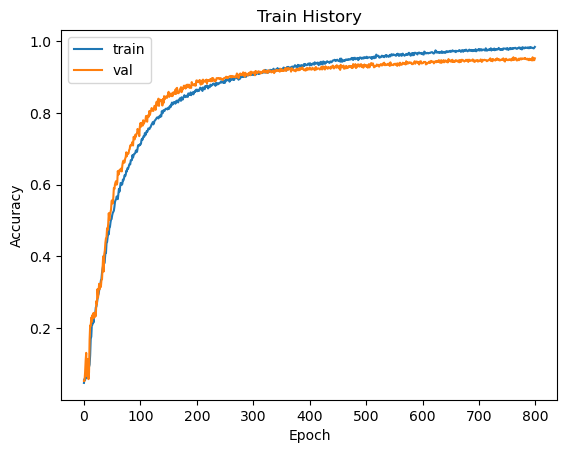

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
nVal = len(os.listdir("cleandataset/ENG_WORD_train_validation/A"))+ \
        len(os.listdir("cleandataset/ENG_WORD_train_validation/B"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/C"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/D"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/E"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/F"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/G"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/H"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/I"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/J"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/K"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/L"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/M"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/N"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/O"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/P"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/Q"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/R"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/S"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/T"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/U"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/V"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/W"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/X"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/Y"))+ \
            len(os.listdir("cleandataset/ENG_WORD_train_validation/Z"))

In [19]:
print(nVal)

2080


In [20]:
validation_features = np.zeros(shape=(nVal, 4, 2, 512))
validation_labels = np.zeros(shape=(nVal,26))#

validation_generator = datagen.flow_from_directory(
    validation_dir,                                 #validation_dir = 'cleandataset/validation'
    target_size=(128, 90),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 4 * 2 * 512))



Found 2080 images belonging to 26 classes.
1/1 [==============================] - 1s 504ms/step


In [21]:
fnames = validation_generator.filenames
print(fnames[0])
ground_truth = validation_generator.classes
print(ground_truth)
label2index = validation_generator.class_indices
print( label2index)
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

print( idx2label)




A\img011-00616.png
[ 0  0  0 ... 25 25 25]
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [22]:
a=ground_truth.reshape((104,20))
print(a[0:50])
print(a[50:100])
print(a[100:104])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

In [23]:
predictions = np.argmax(model.predict(validation_features),axis=1)
prob=model.predict(validation_features)
print(predictions)



65/65 [==============================] - 0s 5ms/step
[12  0  0 ... 25 25 25]


In [24]:
a=predictions.reshape((104,20))
print(a[0:50])
print(a[50:100])
print(a[100:104])

[[12  0  0  0  0  0  0  0  0  0 10 10 17  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 20 20  8  0  0  9  9  0  0 11 12  0]
 [ 0 17 22 17  0  0  0 17  0  0  0  0  0 17 10 17  0  0  0 10]
 [ 0  0  0  0 23 17  0  0  0  0  0 13  0  0  0  0  0  0  0 12]
 [17  4  4  1  4  4  4  4  1 18  4 17  1  4  4  4  4  4  1  1]
 [ 1  1  1 17  4  1  1  1  1  1  4  4  1  1 18  1  4  4  4  1]
 [ 1  4  4  1  1 17  1  4  8  4  4  1  3  1 25  1  1  1  4  1]
 [17 17 18  1 17  4  1  4  4  4  4  1  1  1  4  1 17 17  1  1]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 20  2  2]
 [ 2  2  2  2  2  2  2  2 14  2  2  2  2  2  2  2  2  2  2  2]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 22 22  2  2  2]
 [ 2  2  2  2  2  2  2 20  2  2  2  2  2  2  2  2  2 14 20  2]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  0  0  3  3]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  4 19  3  3  3  3  3]
 [ 3  3  3 14  3 20  3  3  3  3  3  3  3  3  3  3  3  3  3  3]
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3 22  3  3  3  3

In [25]:
np.where(predictions != ground_truth)



(array([   0,   10,   11,   12,   17,   28,   29,   30,   33,   34,   37,
          38,   41,   42,   43,   47,   53,   54,   55,   59,   64,   65,
          71,   79,   80,   81,   82,   84,   85,   86,   87,   89,   90,
          91,   93,   94,   95,   96,   97,  103,  104,  110,  111,  114,
         116,  117,  118,  121,  122,  125,  127,  128,  129,  130,  132,
         134,  138,  140,  141,  142,  144,  145,  147,  148,  149,  150,
         154,  156,  157,  177,  188,  215,  216,  227,  237,  238,  256,
         257,  273,  274,  283,  285,  313,  353,  422,  429,  460,  465,
         466,  480,  496,  501,  507,  508,  510,  514,  515,  516,  517,
         528,  530,  535,  546,  557,  586,  587,  588,  593,  597,  598,
         599,  617,  618,  624,  625,  626,  660,  665,  666,  679,  680,
         681,  682,  683,  685,  689,  692,  693,  695,  696,  697,  700,
         701,  702,  704,  705,  710,  711,  712,  713,  714,  716,  717,
         718,  730,  744,  755,  778, 

In [26]:
i=0
errors = np.where(predictions != ground_truth)[0]
print("Number of errors = {}/{}".format(len(errors),nVal))



Number of errors = 230/2080


Original label:A\img011-00616.png, Prediction :M, confidence : 0.718


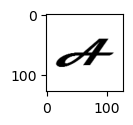

Original label:A\img011-00685.png, Prediction :K, confidence : 0.889


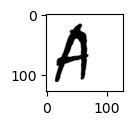

Original label:A\img011-00686.png, Prediction :K, confidence : 0.933


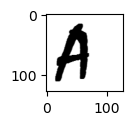

Original label:A\img011-00692.png, Prediction :R, confidence : 0.365


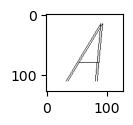

Original label:A\img011-00710.png, Prediction :K, confidence : 0.973


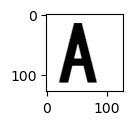

Original label:A\img011-00754.png, Prediction :U, confidence : 0.511


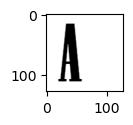

Original label:A\img011-00758.png, Prediction :U, confidence : 0.433


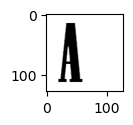

Original label:A\img011-00760.png, Prediction :I, confidence : 0.778


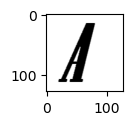

Original label:A\img011-00781.png, Prediction :J, confidence : 0.804


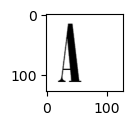

Original label:A\img011-00784.png, Prediction :J, confidence : 0.643


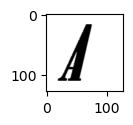

Original label:A\img011-00791.png, Prediction :L, confidence : 0.646


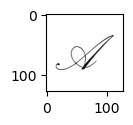

Original label:A\img011-00792.png, Prediction :M, confidence : 0.945


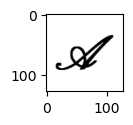

Original label:A\img011-00805.png, Prediction :R, confidence : 0.640


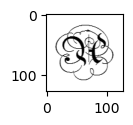

Original label:A\img011-00806.png, Prediction :W, confidence : 0.321


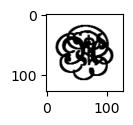

Original label:A\img011-00808.png, Prediction :R, confidence : 0.677


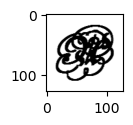

Original label:A\img011-00829.png, Prediction :R, confidence : 0.522


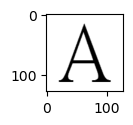

Original label:A\img011-00869.png, Prediction :R, confidence : 0.653


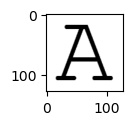

Original label:A\img011-00874.png, Prediction :K, confidence : 0.348


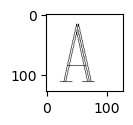

Original label:A\img011-00880.png, Prediction :R, confidence : 0.547


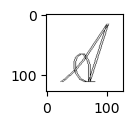

Original label:A\img011-00898.png, Prediction :K, confidence : 0.769


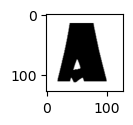

Original label:A\img011-00921.png, Prediction :X, confidence : 0.484


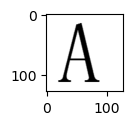

Original label:A\img011-00930.png, Prediction :R, confidence : 0.430


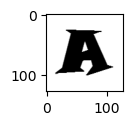

Original label:A\img011-00965.png, Prediction :N, confidence : 0.467


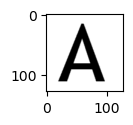

Original label:A\img011-00997.png, Prediction :M, confidence : 0.454


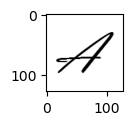

Original label:B\img012-00490.png, Prediction :R, confidence : 0.736


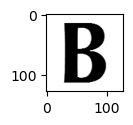

Original label:B\img012-00501.png, Prediction :E, confidence : 0.912


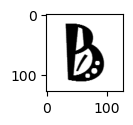

Original label:B\img012-00516.png, Prediction :E, confidence : 0.653


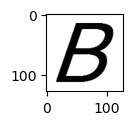

Original label:B\img012-00537.png, Prediction :E, confidence : 0.714


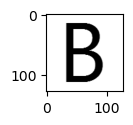

Original label:B\img012-00538.png, Prediction :E, confidence : 0.796


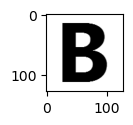

Original label:B\img012-00541.png, Prediction :E, confidence : 0.972


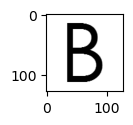

Original label:B\img012-00573.png, Prediction :E, confidence : 0.584


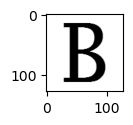

Original label:B\img012-00580.png, Prediction :S, confidence : 0.324


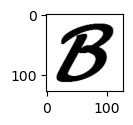

Original label:B\img012-00581.png, Prediction :E, confidence : 0.761


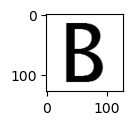

Original label:B\img012-00582.png, Prediction :R, confidence : 0.618


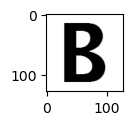

Original label:B\img012-00594.png, Prediction :E, confidence : 0.760


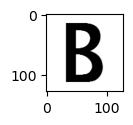

Original label:B\img012-00597.png, Prediction :E, confidence : 0.574


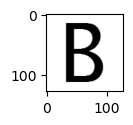

Original label:B\img012-00604.png, Prediction :E, confidence : 0.591


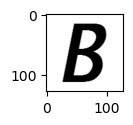

Original label:B\img012-00605.png, Prediction :E, confidence : 0.574


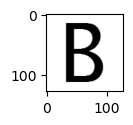

Original label:B\img012-00623.png, Prediction :E, confidence : 0.953


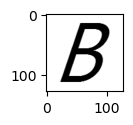

Original label:B\img012-00654.png, Prediction :R, confidence : 0.487


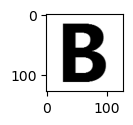

Original label:B\img012-00659.png, Prediction :E, confidence : 0.657


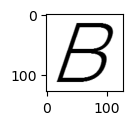

Original label:B\img012-00679.png, Prediction :E, confidence : 0.625


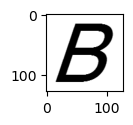

Original label:B\img012-00680.png, Prediction :E, confidence : 0.575


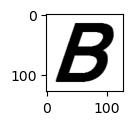

Original label:B\img012-00701.png, Prediction :S, confidence : 0.458


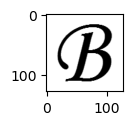

Original label:B\img012-00711.png, Prediction :E, confidence : 0.926


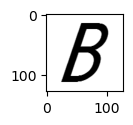

Original label:B\img012-00714.png, Prediction :E, confidence : 0.493


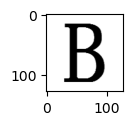

Original label:B\img012-00715.png, Prediction :E, confidence : 0.565


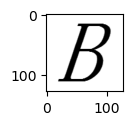

Original label:B\img012-00729.png, Prediction :E, confidence : 0.982


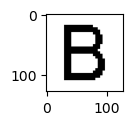

Original label:B\img012-00730.png, Prediction :E, confidence : 0.851


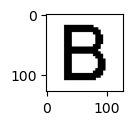

Original label:B\img012-00754.png, Prediction :R, confidence : 0.322


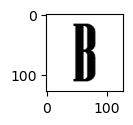

Original label:B\img012-00775.png, Prediction :E, confidence : 0.862


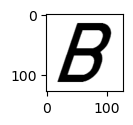

Original label:B\img012-00784.png, Prediction :I, confidence : 0.514


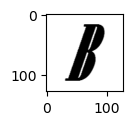

Original label:B\img012-00787.png, Prediction :E, confidence : 0.691


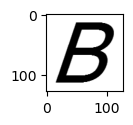

Original label:B\img012-00791.png, Prediction :E, confidence : 0.317


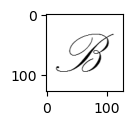

Original label:B\img012-00803.png, Prediction :D, confidence : 0.715


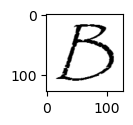

Original label:B\img012-00828.png, Prediction :Z, confidence : 0.498


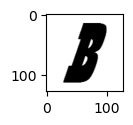

Original label:B\img012-00851.png, Prediction :E, confidence : 0.664


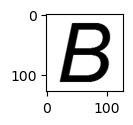

Original label:B\img012-00875.png, Prediction :R, confidence : 0.602


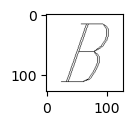

Original label:B\img012-00876.png, Prediction :R, confidence : 0.522


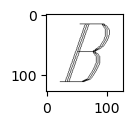

Original label:B\img012-00877.png, Prediction :S, confidence : 0.455


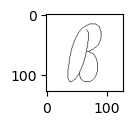

Original label:B\img012-00898.png, Prediction :R, confidence : 0.829


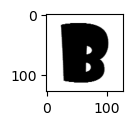

Original label:B\img012-00903.png, Prediction :E, confidence : 0.857


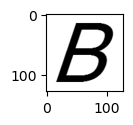

Original label:B\img012-00906.png, Prediction :E, confidence : 0.908


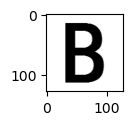

Original label:B\img012-00907.png, Prediction :E, confidence : 0.754


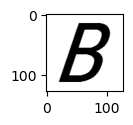

Original label:B\img012-00912.png, Prediction :E, confidence : 0.507


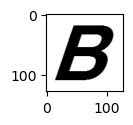

Original label:B\img012-00913.png, Prediction :E, confidence : 0.489


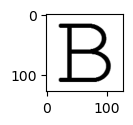

Original label:B\img012-00927.png, Prediction :E, confidence : 0.664


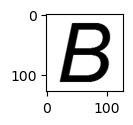

Original label:B\img012-00935.png, Prediction :R, confidence : 0.842


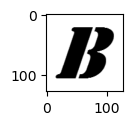

Original label:B\img012-00936.png, Prediction :R, confidence : 0.910


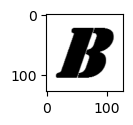

Original label:C\img013-00107.png, Prediction :U, confidence : 0.774


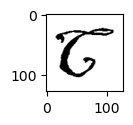

Original label:C\img013-00142.png, Prediction :O, confidence : 0.923


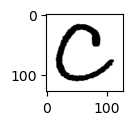

Original label:C\img013-00293.png, Prediction :W, confidence : 0.504


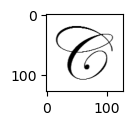

Original label:C\img013-00295.png, Prediction :W, confidence : 0.404


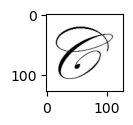

Original label:C\img013-00347.png, Prediction :U, confidence : 0.447


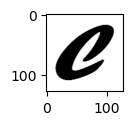

Original label:C\img013-00387.png, Prediction :O, confidence : 0.282


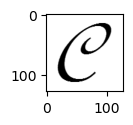

Original label:C\img013-00388.png, Prediction :U, confidence : 0.356


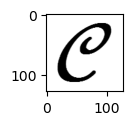

Original label:D\img014-00083.png, Prediction :A, confidence : 0.331


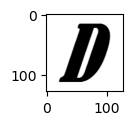

Original label:D\img014-00084.png, Prediction :A, confidence : 0.408


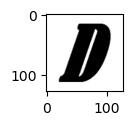

Original label:D\img014-00151.png, Prediction :E, confidence : 0.294


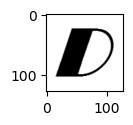

Original label:D\img014-00163.png, Prediction :T, confidence : 0.525


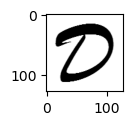

Original label:D\img014-00211.png, Prediction :O, confidence : 0.540


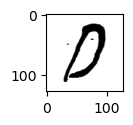

Original label:D\img014-00217.png, Prediction :U, confidence : 0.854


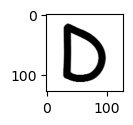

Original label:D\img014-00402.png, Prediction :W, confidence : 0.445


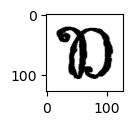

Original label:E\img015-00143.png, Prediction :U, confidence : 0.660


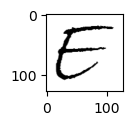

Original label:F\img016-00105.png, Prediction :T, confidence : 0.277


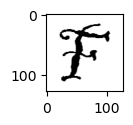

Original label:F\img016-00124.png, Prediction :Y, confidence : 0.419


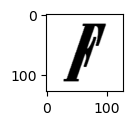

Original label:F\img016-00255.png, Prediction :Z, confidence : 0.434


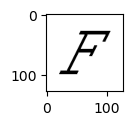

Original label:F\img016-00293.png, Prediction :T, confidence : 0.606


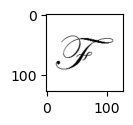

Original label:F\img016-00294.png, Prediction :W, confidence : 0.432


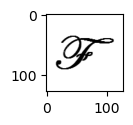

Original label:G\img017-00001.png, Prediction :E, confidence : 0.461


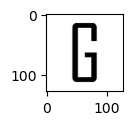

Original label:G\img017-00105.png, Prediction :Q, confidence : 0.713


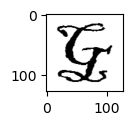

Original label:G\img017-00123.png, Prediction :U, confidence : 0.396


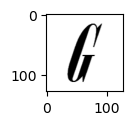

Original label:G\img017-00149.png, Prediction :C, confidence : 0.882


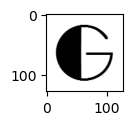

Original label:G\img017-00150.png, Prediction :C, confidence : 0.911


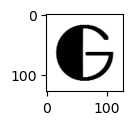

Original label:G\img017-00163.png, Prediction :Q, confidence : 0.542


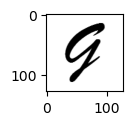

Original label:G\img017-00189.png, Prediction :Q, confidence : 0.358


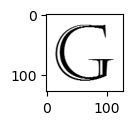

Original label:G\img017-00191.png, Prediction :O, confidence : 0.360


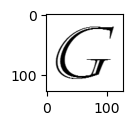

Original label:G\img017-00210.png, Prediction :R, confidence : 0.626


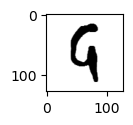

Original label:G\img017-00212.png, Prediction :Q, confidence : 0.597


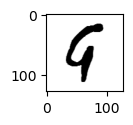

Original label:G\img017-00255.png, Prediction :S, confidence : 0.529


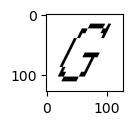

Original label:G\img017-00261.png, Prediction :Q, confidence : 0.584


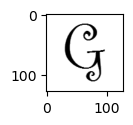

Original label:G\img017-00293.png, Prediction :Q, confidence : 0.290


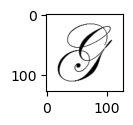

Original label:G\img017-00347.png, Prediction :U, confidence : 0.382


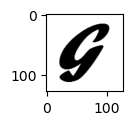

Original label:G\img017-00385.png, Prediction :S, confidence : 0.492


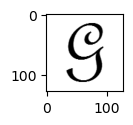

Original label:H\img018-00121.png, Prediction :U, confidence : 0.248


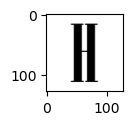

Original label:H\img018-00122.png, Prediction :U, confidence : 0.388


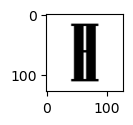

Original label:H\img018-00124.png, Prediction :J, confidence : 0.436


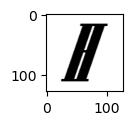

Original label:H\img018-00143.png, Prediction :P, confidence : 0.288


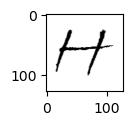

Original label:H\img018-00151.png, Prediction :K, confidence : 0.451


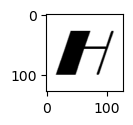

Original label:H\img018-00152.png, Prediction :E, confidence : 0.493


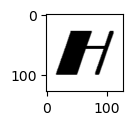

Original label:H\img018-00161.png, Prediction :R, confidence : 0.373


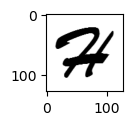

Original label:H\img018-00253.png, Prediction :E, confidence : 0.479


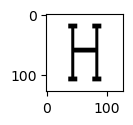

Original label:H\img018-00264.png, Prediction :Y, confidence : 0.407


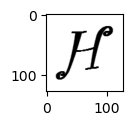

Original label:H\img018-00294.png, Prediction :W, confidence : 0.445


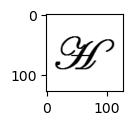

Original label:H\img018-00295.png, Prediction :X, confidence : 0.279


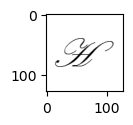

Original label:H\img018-00296.png, Prediction :W, confidence : 0.397


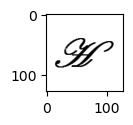

Original label:I\img019-00092.png, Prediction :Z, confidence : 0.846


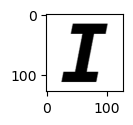

Original label:I\img019-00105.png, Prediction :J, confidence : 0.567


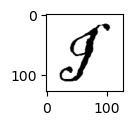

Original label:I\img019-00108.png, Prediction :Y, confidence : 0.455


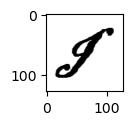

Original label:I\img019-00161.png, Prediction :O, confidence : 0.413


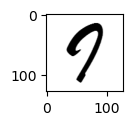

Original label:I\img019-00171.png, Prediction :J, confidence : 0.424


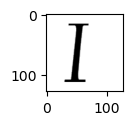

Original label:I\img019-00182.png, Prediction :J, confidence : 0.492


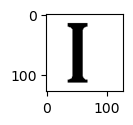

Original label:I\img019-00187.png, Prediction :J, confidence : 0.861


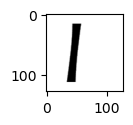

Original label:I\img019-00188.png, Prediction :J, confidence : 0.403


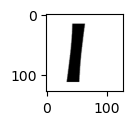

Original label:I\img019-00194.png, Prediction :J, confidence : 0.480


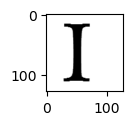

Original label:I\img019-00201.png, Prediction :J, confidence : 0.807


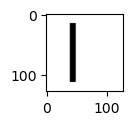

Original label:I\img019-00224.png, Prediction :Z, confidence : 0.623


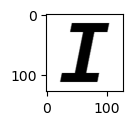

Original label:I\img019-00225.png, Prediction :Y, confidence : 0.491


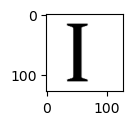

Original label:I\img019-00230.png, Prediction :L, confidence : 0.947


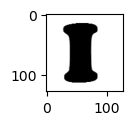

Original label:I\img019-00235.png, Prediction :J, confidence : 0.598


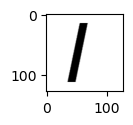

Original label:I\img019-00237.png, Prediction :J, confidence : 0.384


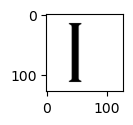

Original label:I\img019-00260.png, Prediction :Z, confidence : 0.990


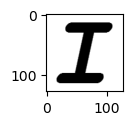

Original label:I\img019-00262.png, Prediction :J, confidence : 0.455


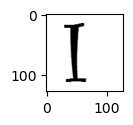

Original label:I\img019-00266.png, Prediction :J, confidence : 0.414


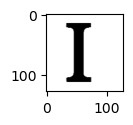

Original label:I\img019-00278.png, Prediction :L, confidence : 0.497


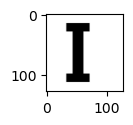

Original label:I\img019-00286.png, Prediction :J, confidence : 0.430


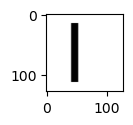

Original label:I\img019-00321.png, Prediction :J, confidence : 0.354


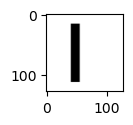

Original label:I\img019-00322.png, Prediction :J, confidence : 0.399


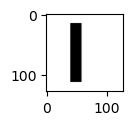

Original label:I\img019-00348.png, Prediction :J, confidence : 0.463


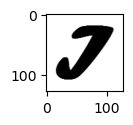

Original label:I\img019-00354.png, Prediction :U, confidence : 0.568


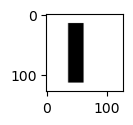

Original label:I\img019-00362.png, Prediction :L, confidence : 0.724


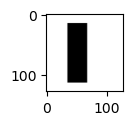

Original label:I\img019-00374.png, Prediction :J, confidence : 0.360


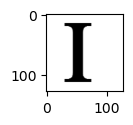

Original label:I\img019-00381.png, Prediction :J, confidence : 0.861


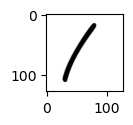

Original label:I\img019-00385.png, Prediction :S, confidence : 0.881


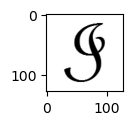

Original label:J\img020-00076.png, Prediction :I, confidence : 0.478


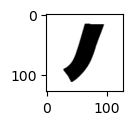

Original label:J\img020-00149.png, Prediction :A, confidence : 0.835


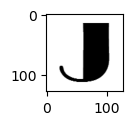

Original label:J\img020-00215.png, Prediction :Y, confidence : 0.494


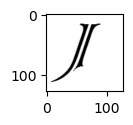

Original label:J\img020-00345.png, Prediction :T, confidence : 0.970


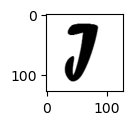

Original label:J\img020-00347.png, Prediction :Z, confidence : 0.752


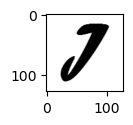

Original label:J\img020-00365.png, Prediction :I, confidence : 0.636


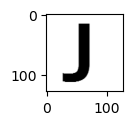

Original label:J\img020-00366.png, Prediction :I, confidence : 0.656


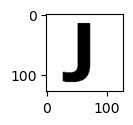

Original label:J\img020-00384.png, Prediction :Z, confidence : 0.509


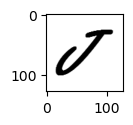

Original label:K\img021-00107.png, Prediction :Q, confidence : 0.772


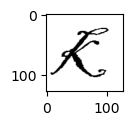

Original label:K\img021-00149.png, Prediction :V, confidence : 0.402


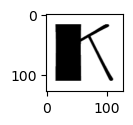

Original label:K\img021-00256.png, Prediction :Z, confidence : 0.277


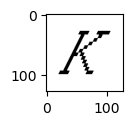

Original label:K\img021-00293.png, Prediction :W, confidence : 0.315


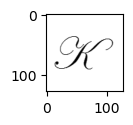

Original label:L\img022-00123.png, Prediction :I, confidence : 0.593


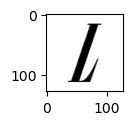

Original label:L\img022-00296.png, Prediction :R, confidence : 0.373


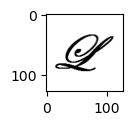

Original label:L\img022-00348.png, Prediction :Z, confidence : 0.868


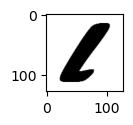

Original label:L\img022-00384.png, Prediction :Z, confidence : 0.682


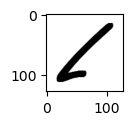

Original label:M\img023-00211.png, Prediction :H, confidence : 0.648


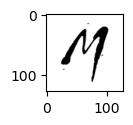

Original label:M\img023-00263.png, Prediction :W, confidence : 0.269


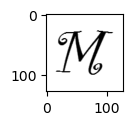

Original label:N\img024-00123.png, Prediction :I, confidence : 0.868


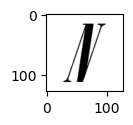

Original label:N\img024-00124.png, Prediction :I, confidence : 0.503


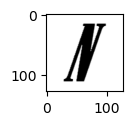

Original label:N\img024-00161.png, Prediction :R, confidence : 0.643


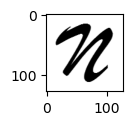

Original label:N\img024-00189.png, Prediction :V, confidence : 0.370


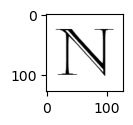

Original label:N\img024-00191.png, Prediction :W, confidence : 0.275


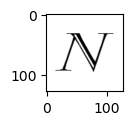

Original label:N\img024-00210.png, Prediction :M, confidence : 0.502


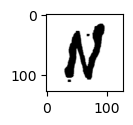

Original label:N\img024-00211.png, Prediction :M, confidence : 0.707


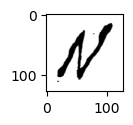

Original label:N\img024-00277.png, Prediction :M, confidence : 0.382


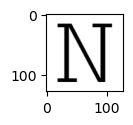

Original label:N\img024-00279.png, Prediction :M, confidence : 0.442


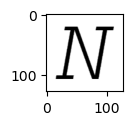

Original label:N\img024-00296.png, Prediction :W, confidence : 0.555


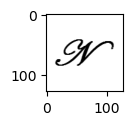

Original label:N\img024-00301.png, Prediction :S, confidence : 0.639


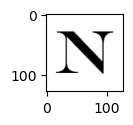

Original label:N\img024-00383.png, Prediction :M, confidence : 0.287


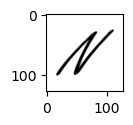

Original label:N\img024-00385.png, Prediction :W, confidence : 0.427


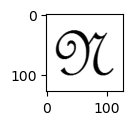

Original label:N\img024-00386.png, Prediction :W, confidence : 0.688


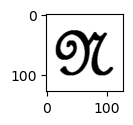

Original label:N\img024-00388.png, Prediction :M, confidence : 0.460


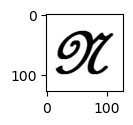

Original label:O\img025-00003.png, Prediction :D, confidence : 0.565


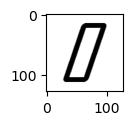

Original label:O\img025-00117.png, Prediction :U, confidence : 0.395


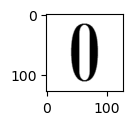

Original label:O\img025-00152.png, Prediction :C, confidence : 0.963


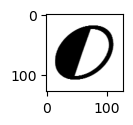

Original label:O\img025-00210.png, Prediction :G, confidence : 0.851


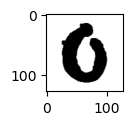

Original label:O\img025-00387.png, Prediction :U, confidence : 0.357


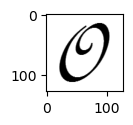

Original label:O\img025-00402.png, Prediction :G, confidence : 0.480


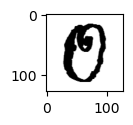

Original label:P\img026-00149.png, Prediction :E, confidence : 0.529


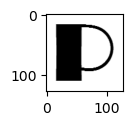

Original label:P\img026-00150.png, Prediction :E, confidence : 0.388


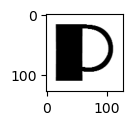

Original label:Q\img027-00105.png, Prediction :K, confidence : 0.261


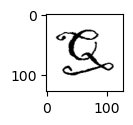

Original label:Q\img027-00120.png, Prediction :O, confidence : 0.478


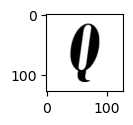

Original label:Q\img027-00210.png, Prediction :W, confidence : 0.764


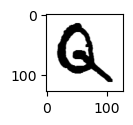

Original label:Q\img027-00243.png, Prediction :O, confidence : 0.872


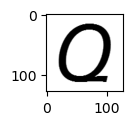

Original label:Q\img027-00244.png, Prediction :O, confidence : 0.962


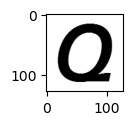

Original label:Q\img027-00309.png, Prediction :O, confidence : 0.900


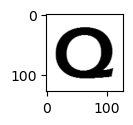

Original label:Q\img027-00312.png, Prediction :O, confidence : 0.944


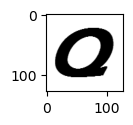

Original label:Q\img027-00316.png, Prediction :O, confidence : 0.922


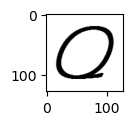

Original label:Q\img027-00401.png, Prediction :R, confidence : 0.493


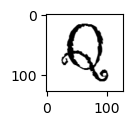

Original label:R\img028-00141.png, Prediction :W, confidence : 0.683


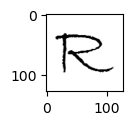

Original label:R\img028-00149.png, Prediction :E, confidence : 0.623


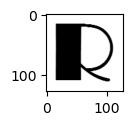

Original label:R\img028-00211.png, Prediction :X, confidence : 0.743


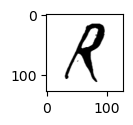

Original label:R\img028-00294.png, Prediction :W, confidence : 0.509


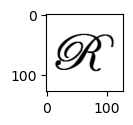

Original label:S\img029-00106.png, Prediction :A, confidence : 0.425


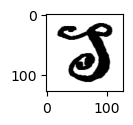

Original label:S\img029-00143.png, Prediction :E, confidence : 0.340


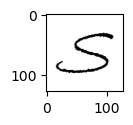

Original label:S\img029-00295.png, Prediction :Y, confidence : 0.357


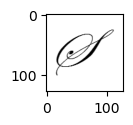

Original label:T\img030-00296.png, Prediction :Y, confidence : 0.513


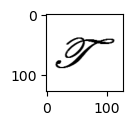

Original label:T\img030-00315.png, Prediction :J, confidence : 0.438


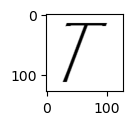

Original label:U\img031-00084.png, Prediction :E, confidence : 0.625


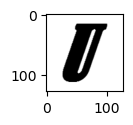

Original label:U\img031-00142.png, Prediction :R, confidence : 0.255


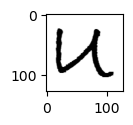

Original label:U\img031-00163.png, Prediction :R, confidence : 0.592


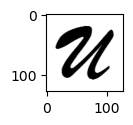

Original label:U\img031-00164.png, Prediction :R, confidence : 0.645


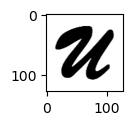

Original label:U\img031-00214.png, Prediction :Q, confidence : 0.730


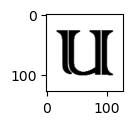

Original label:U\img031-00263.png, Prediction :O, confidence : 0.389


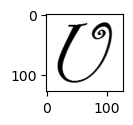

Original label:U\img031-00293.png, Prediction :Z, confidence : 0.295


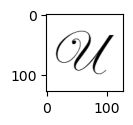

Original label:U\img031-00345.png, Prediction :H, confidence : 0.885


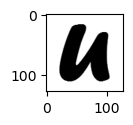

Original label:U\img031-00384.png, Prediction :P, confidence : 0.397


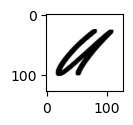

Original label:U\img031-00387.png, Prediction :W, confidence : 0.843


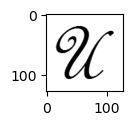

Original label:V\img032-00121.png, Prediction :Y, confidence : 0.646


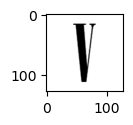

Original label:V\img032-00122.png, Prediction :Y, confidence : 0.651


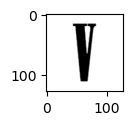

Original label:V\img032-00383.png, Prediction :Y, confidence : 0.459


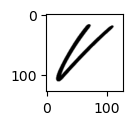

Original label:W\img033-00210.png, Prediction :N, confidence : 0.840


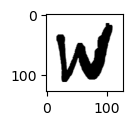

Original label:W\img033-00211.png, Prediction :M, confidence : 0.974


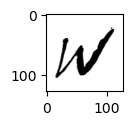

Original label:W\img033-00253.png, Prediction :R, confidence : 0.441


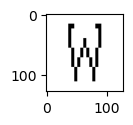

Original label:X\img034-00113.png, Prediction :N, confidence : 0.508


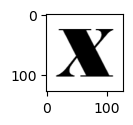

Original label:X\img034-00293.png, Prediction :M, confidence : 0.175


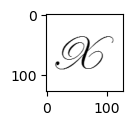

Original label:X\img034-00294.png, Prediction :M, confidence : 0.397


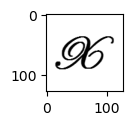

Original label:Y\img035-00107.png, Prediction :Z, confidence : 0.378


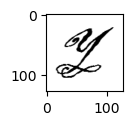

Original label:Y\img035-00108.png, Prediction :L, confidence : 0.320


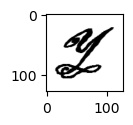

Original label:Y\img035-00124.png, Prediction :T, confidence : 0.376


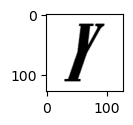

Original label:Y\img035-00141.png, Prediction :T, confidence : 0.613


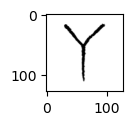

Original label:Y\img035-00142.png, Prediction :T, confidence : 0.647


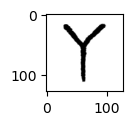

Original label:Z\img036-00163.png, Prediction :F, confidence : 0.569


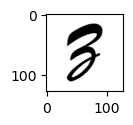

Original label:Z\img036-00433.png, Prediction :W, confidence : 0.420


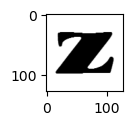

Original label:Z\img036-00435.png, Prediction :R, confidence : 0.389


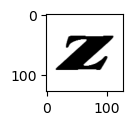

In [27]:
for i in range(len(errors)):
    pred_class = np.argmax(prob[errors[i]])
    pred_label = idx2label[pred_class]
   
    print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        prob[errors[i]][pred_class]))
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=(1,1)) 
    plt.imshow(original)   
    plt.show()

In [28]:
score=model.evaluate(validation_features,validation_labels,verbose=0)

In [29]:
#模型評估
print('test loss :',score[0])
print('test accuray :',score[1])

test loss : 0.5044940710067749
test accuray : 0.8894230723381042


In [30]:
from sklearn.metrics import confusion_matrix
predict=np.argmax(prob,axis=1)
GroundTruth=np.argmax(validation_labels,axis=1)
c=confusion_matrix(GroundTruth,predict)
#print(confusion_matrix(GroundTruth,predict))


In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
import os,sys
from utility import plot_confusion_matrix

Confusion matrix, without normalization


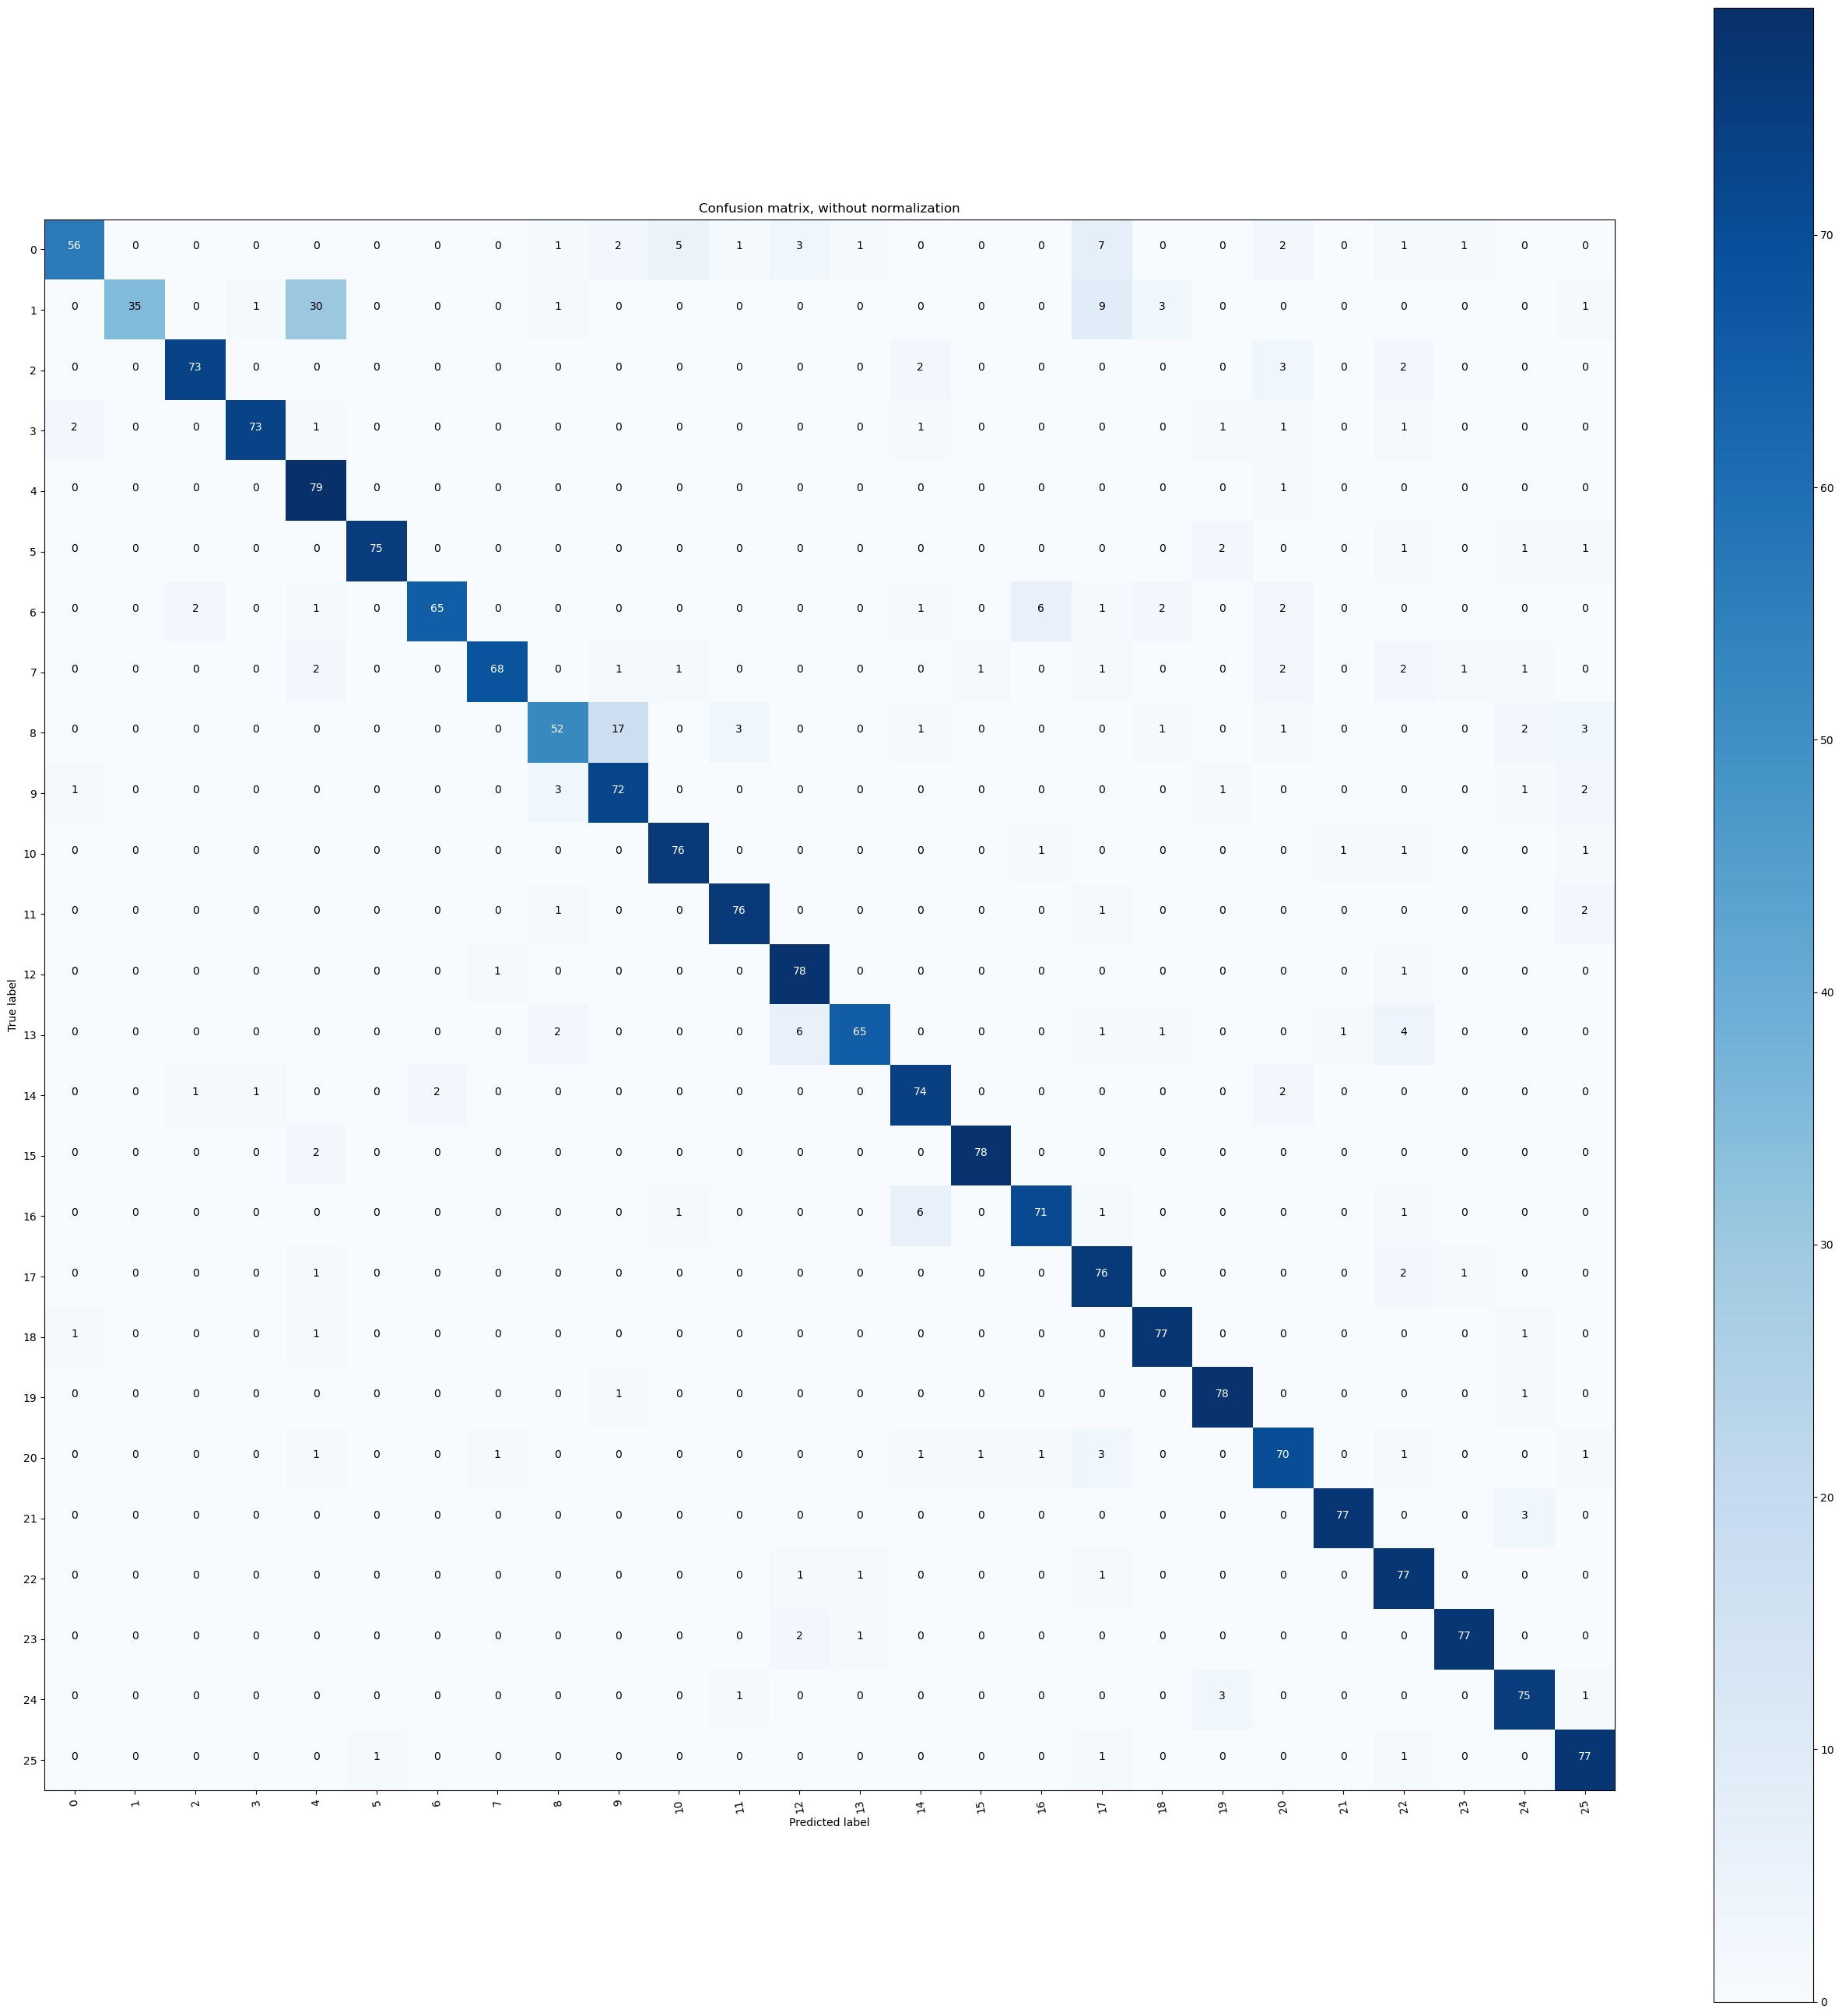

In [32]:
plt.figure(figsize=(26,26))
plot_confusion_matrix(c, classes=range(26),title='Confusion matrix, without normalization')

plt.show()